# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Data visualisation and matplotlib

It can be difficult to demonstrate the importance of data visualization. Some people are of the impression that charts are simply "pretty pictures", while all of the important information can be divined through statistical analysis. 
An effective (and often used) tool used to demonstrate that visualizing your data is in fact important is [Anscome's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Developed by Francis J. Anscombe in 1973, Anscombe's Quartet is a set of four datasets, where each produces the same summary statistics (mean, standard deviation, and correlation), which could lead one to believe the datasets are quite similar. However, after visualizing (plotting) the data, it becomes clear that the datasets are markedly different. The effectiveness of Anscombe's Quartet is not due to simply having four different datasets which generate the same statistical properties, it is that four clearly different and visually distinct datasets are producing the same statistical properties. In contrast the "Unstructured Quartet" on the right in Figure 1 also shares the same statistical properties as Anscombe's Quartet, however without any obvious underlying structure to the individual datasets, this quartet is not nearly as effective at demonstrating the importance of visualizing your data. 

<p align="center">
    <img width="1000" src="https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif">
</p>

Recently, a funny dataset has been created: the Datasaurus dataset which urges people to "never trust summary statistics alone; always visualize your data", since, while the data exhibits normal seeming statistics, plotting the data reveals a picture of a dinosaur 🦖. Inspired by Anscombe's Quartet and the Datasaurus you can download here the [_datasaurus dozen_](https://www.autodesk.com/content/dam/autodesk/www/autodesk-reasearch/Publications/pdf/The%20Datasaurus%20Dozen.zip), _i.e._ 13 datasets (the Datasaurus + $12$ others) having the same summary statistics to two decimal places, while being drastically different in appearance.

Hence, the golden rule is the following one.

> Always find a smart way to visualise your data. 

### Pandas plotting

Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series.

To get started we need to import Matplotlib.

In [18]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams['figure.figsize'] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

---
## Graphical analysis

The aim is to start our data analysis using Python data visualization tools.

### Matplotlib and Seaborn

[Matplotlib](https://matplotlib.org/) is a highly customisable library, maybe too much customisable, hence a bit tricky at first. [Seaborn](https://seaborn.pydata.org/) standardises some graphical aspects and easily integrates with Pandas.

Recall we imported seaborn as sns and we called `sns.set()`.
Indeed, once that Seaborn has been imported, we can use the set function to force its default graphical settings.

```python
import seaborn as sns
sns.set()
```

Tricky question for you:
> Why we import Seaborn as `sns`?

<details>
    <summary><b>HINT</b></summary> 
    <p align="center">
      <a href= "https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns"><img src="https://www.thesun.co.uk/wp-content/uploads/2019/06/NINTCHDBPICT000002475114.jpg" width="350" title="Sam Norman Seaborn"></a>
    </p>
    Click on the image for a little bit more detailed answer.
</details>

#### Import data

Let's start by import movie dataset and plot the relationship between `ratings` and `revenue`. 
All we need to do is call `plot()` on df with some info about how to construct the plot.

In [3]:
data_url = 'https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv'

df = pd.read_csv(data_url, parse_dates = True, index_col = "Title")

The `plot` method inherits from matplotlib and prints a plot of the content of a dataframe or a Series (an individual column of a dataframe).

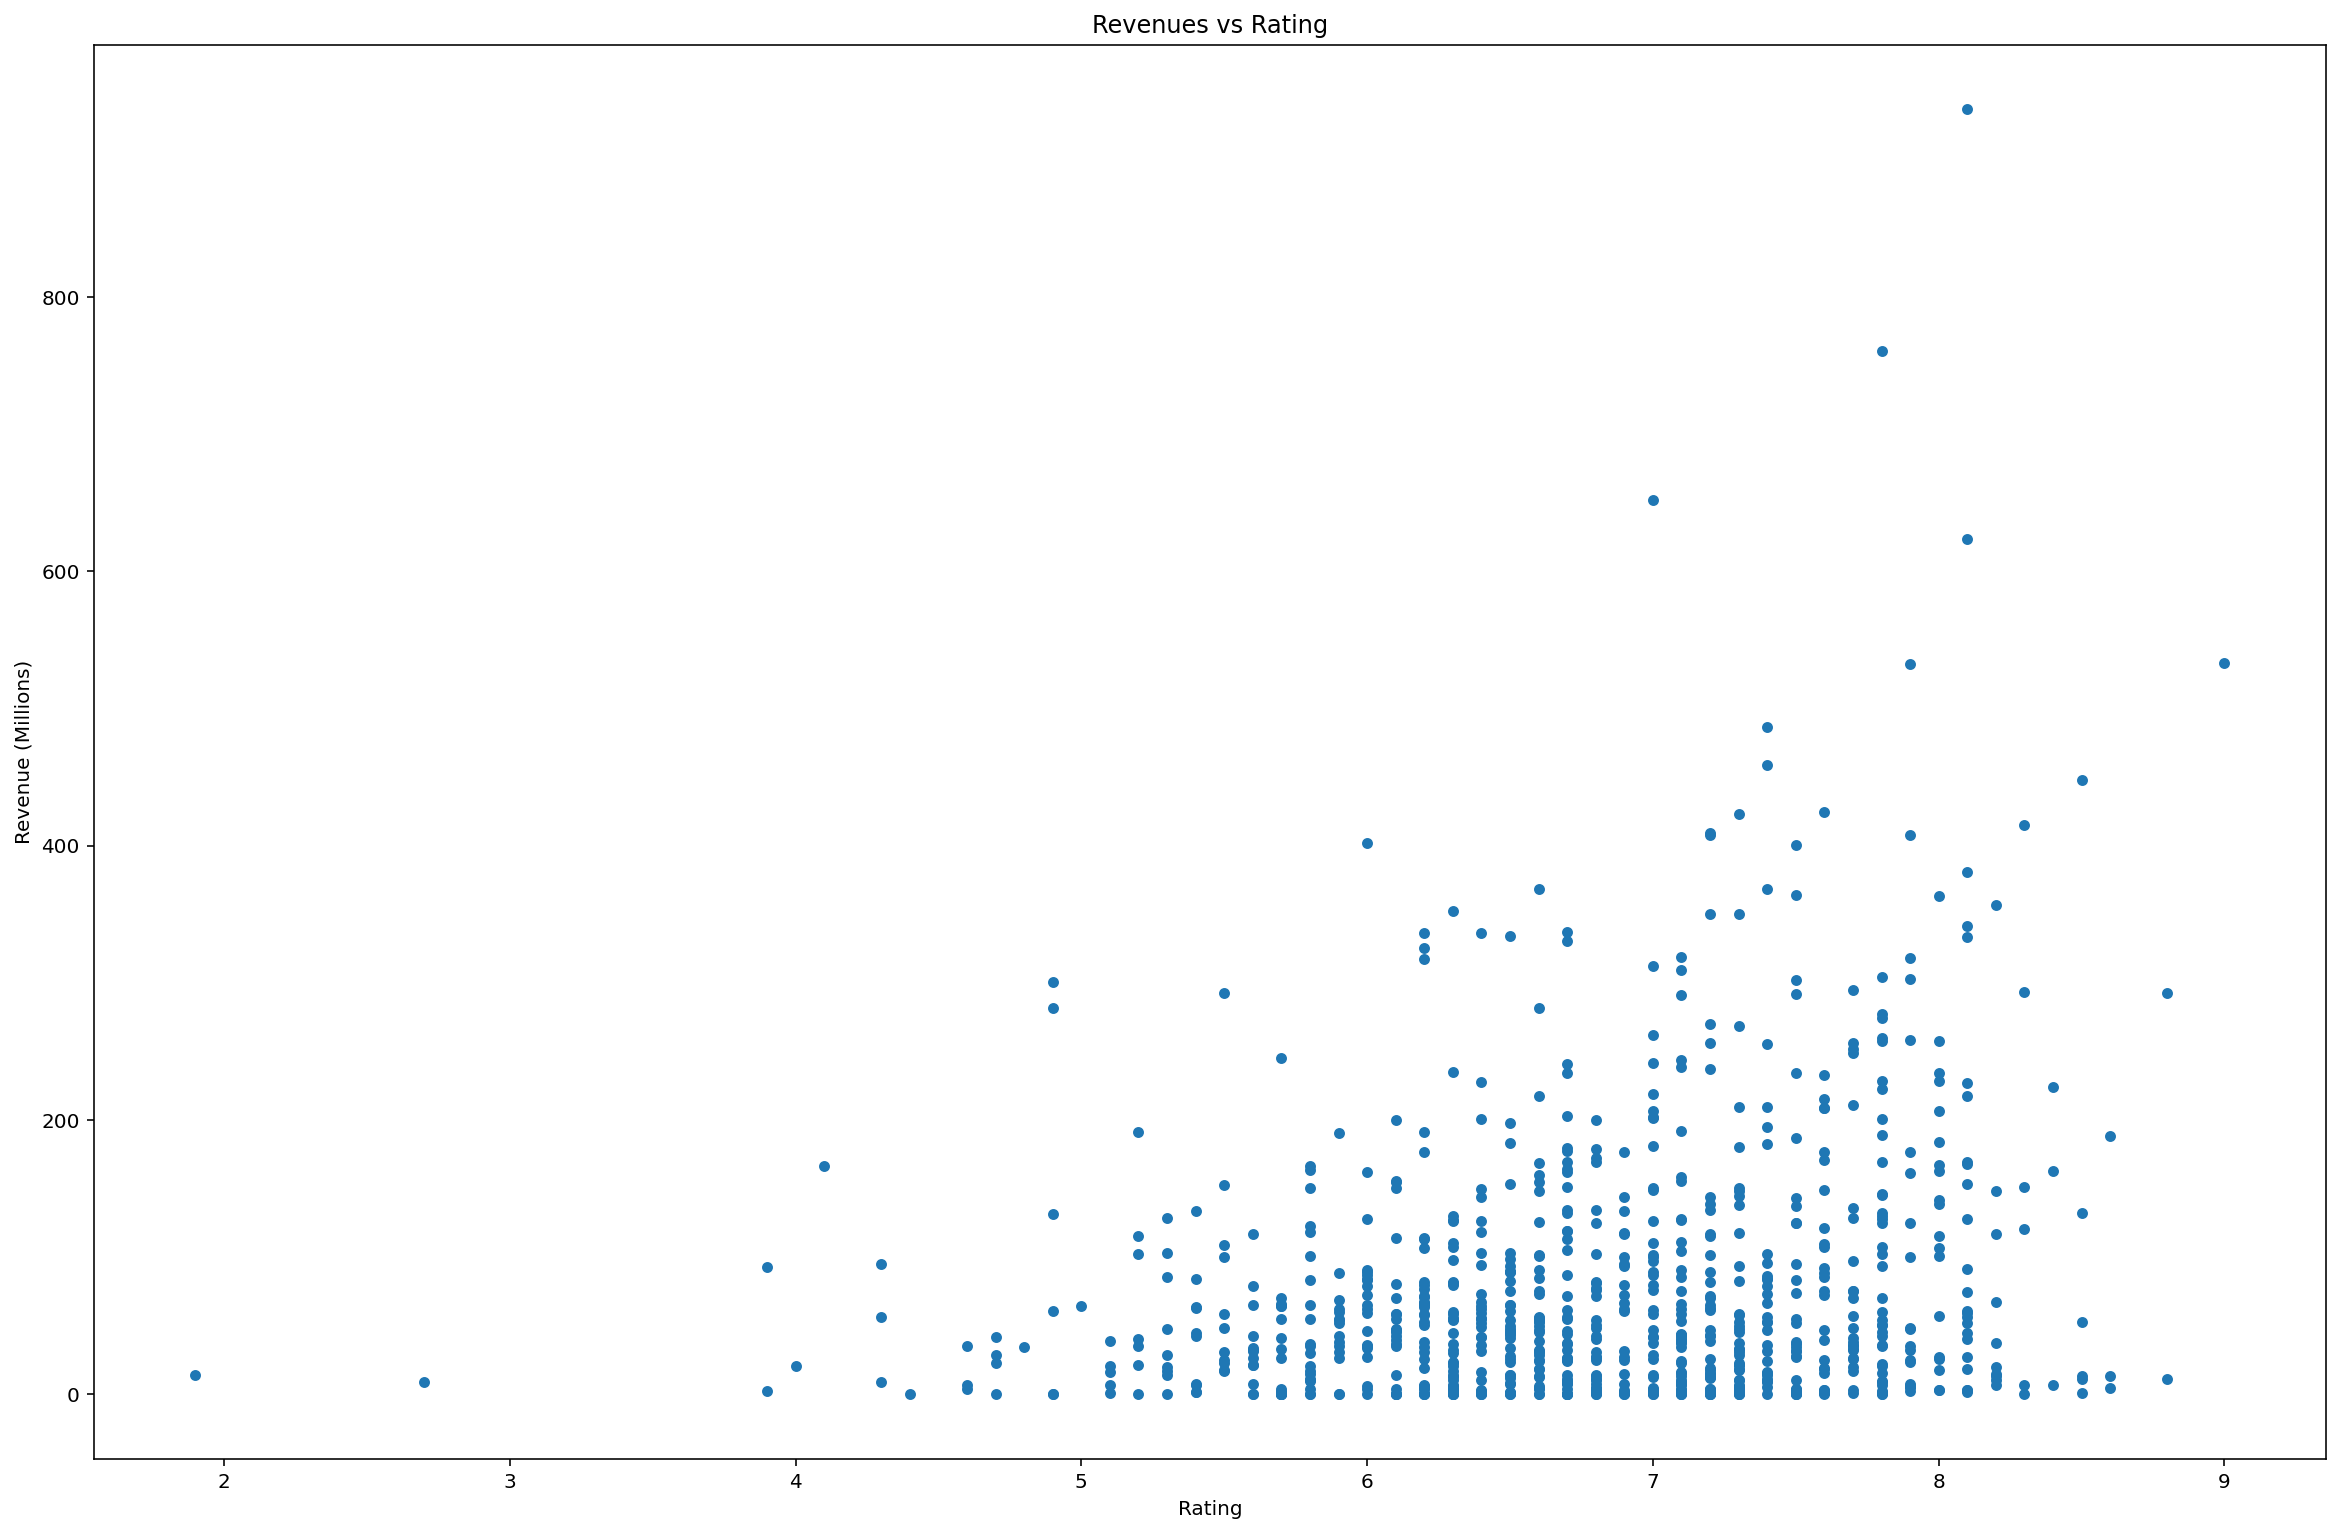

In [13]:
df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', 
    title = "Revenues vs Rating", figsize=(20,13));

Pandas' `plot` function has many optional arguments.

Some of these arguments are linked to Matplotlib properties and not directly available within the function documentation (😠). 
A complete list of such properties can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html).

Note the optional argument, especially the `marker` and `color` ones.

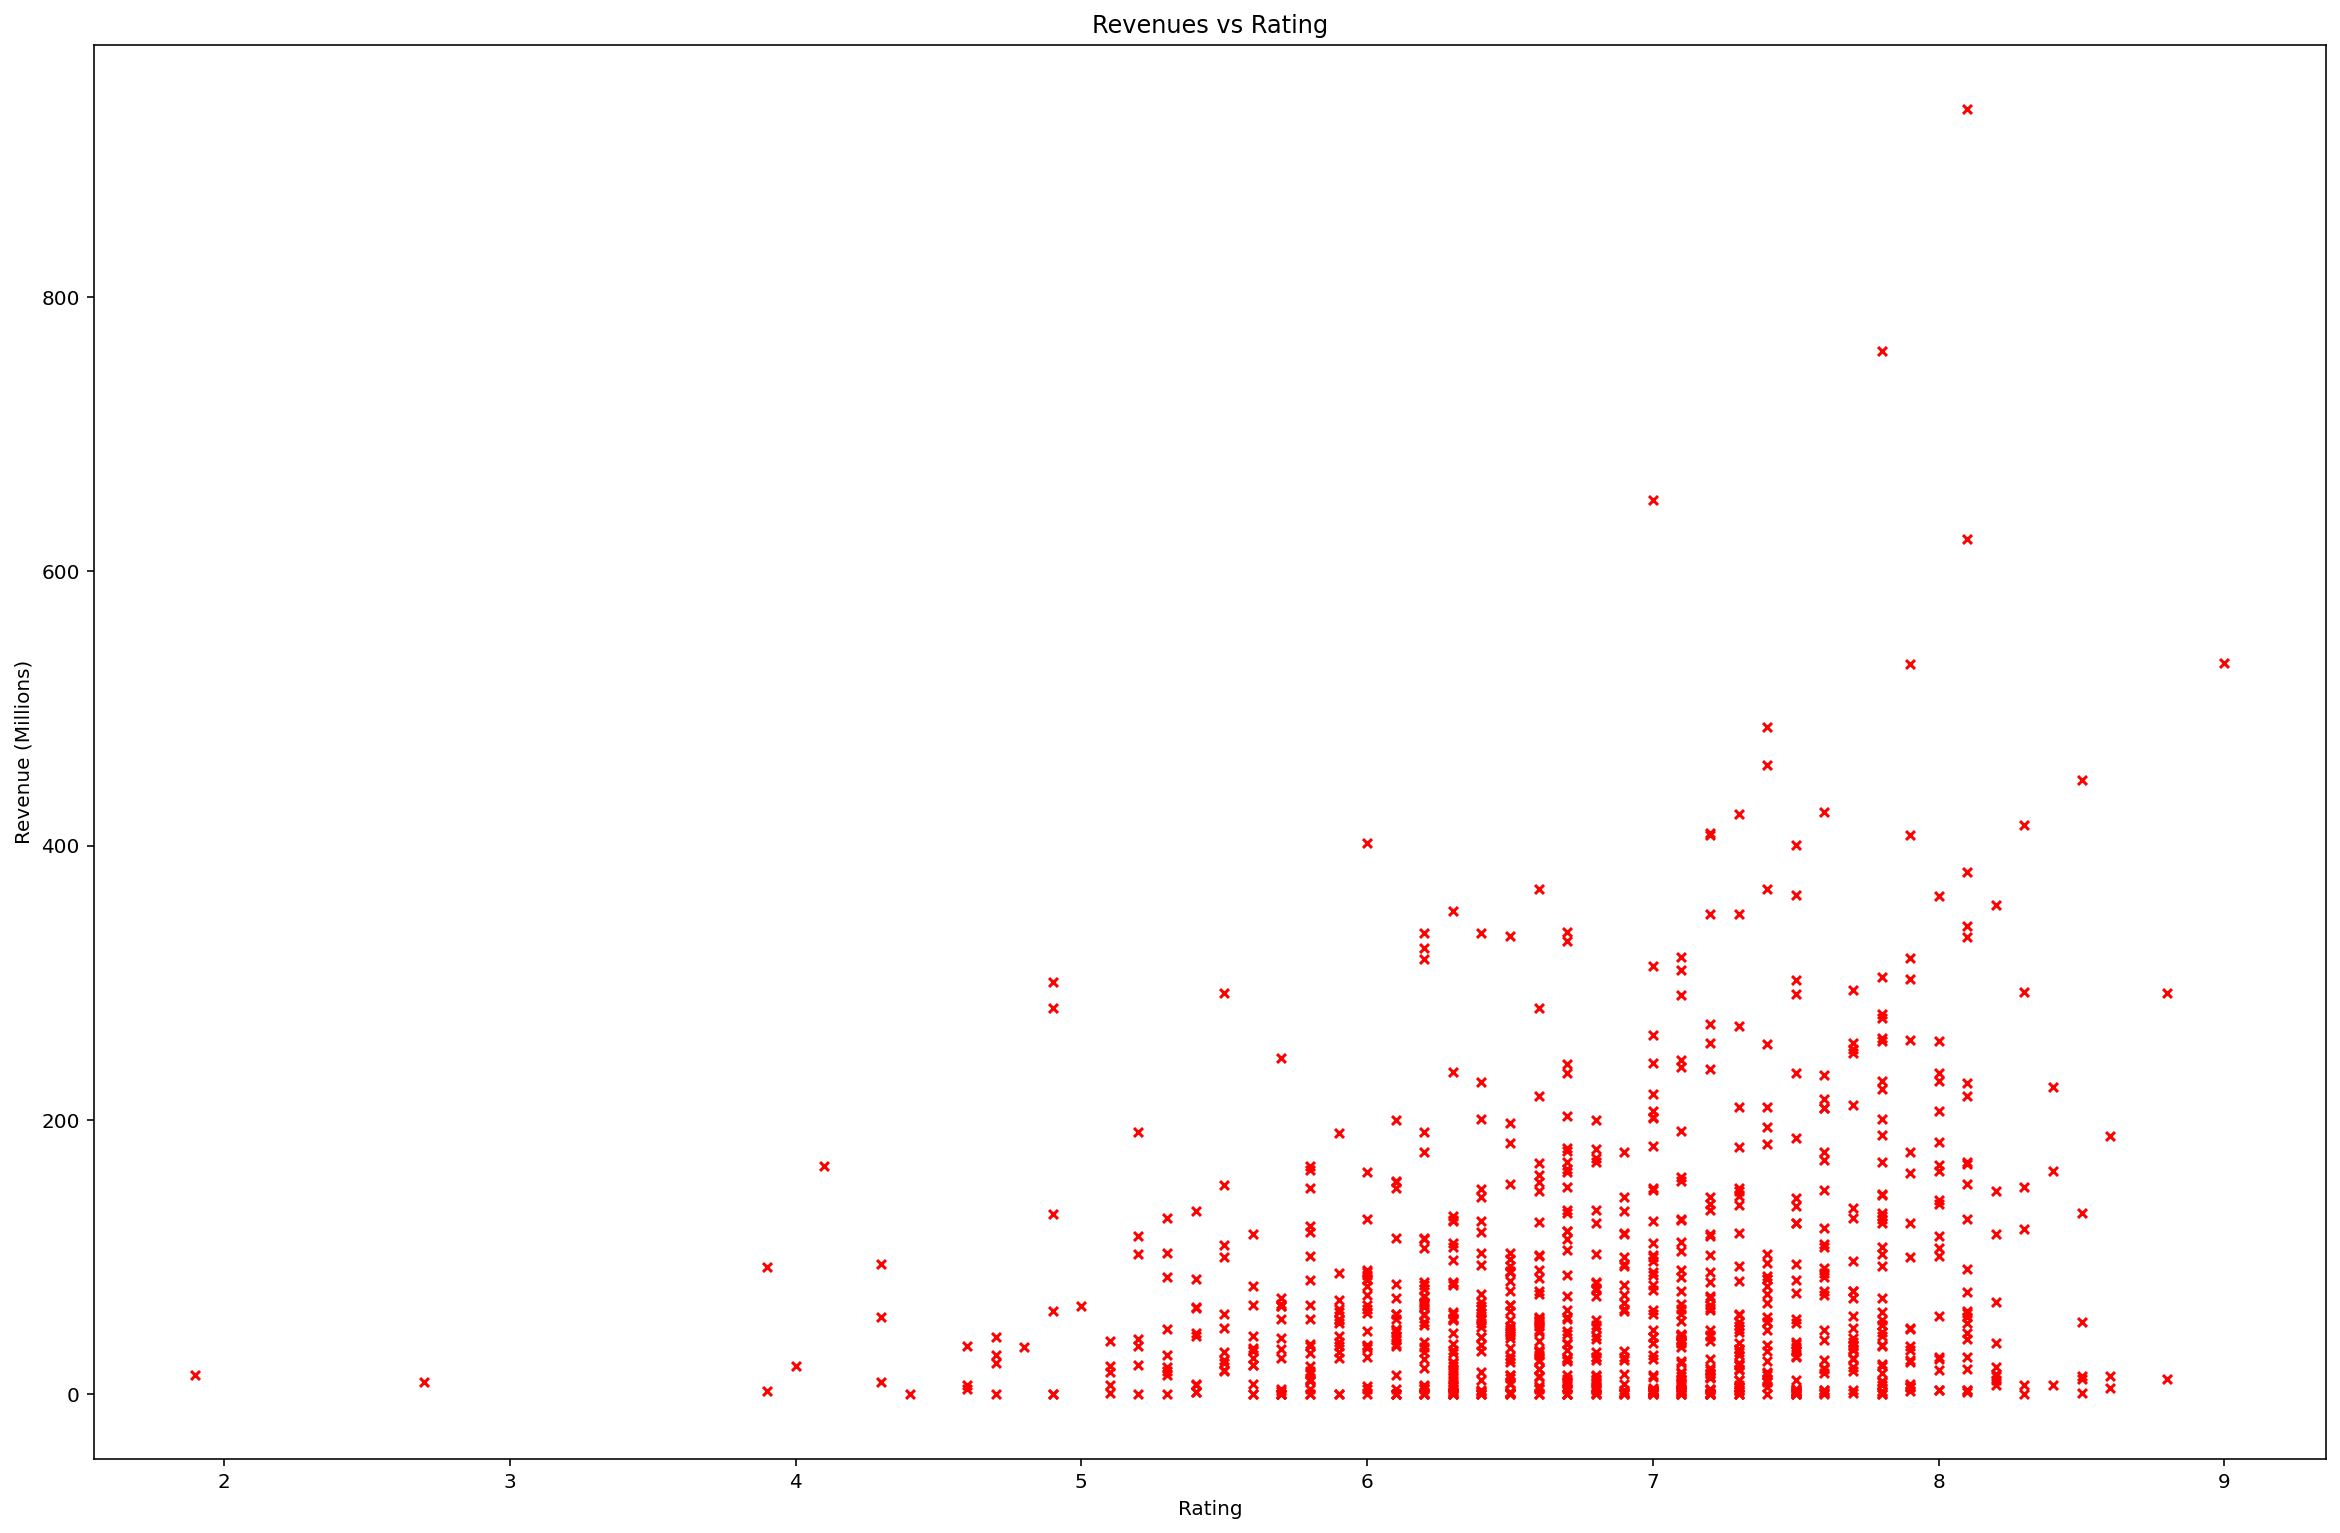

In [25]:
df.plot(kind='scatter', 
    x='Rating', 
    y='Revenue (Millions)', 
    title = "Revenues vs Rating",
    marker='x',
    color='r',
    figsize=(20,13));

Since `plot` is a series or dataframe objects method, we can apply filters, queries, etc. and all functions returning a series or a dataframe before and then plot the filtered quantities.

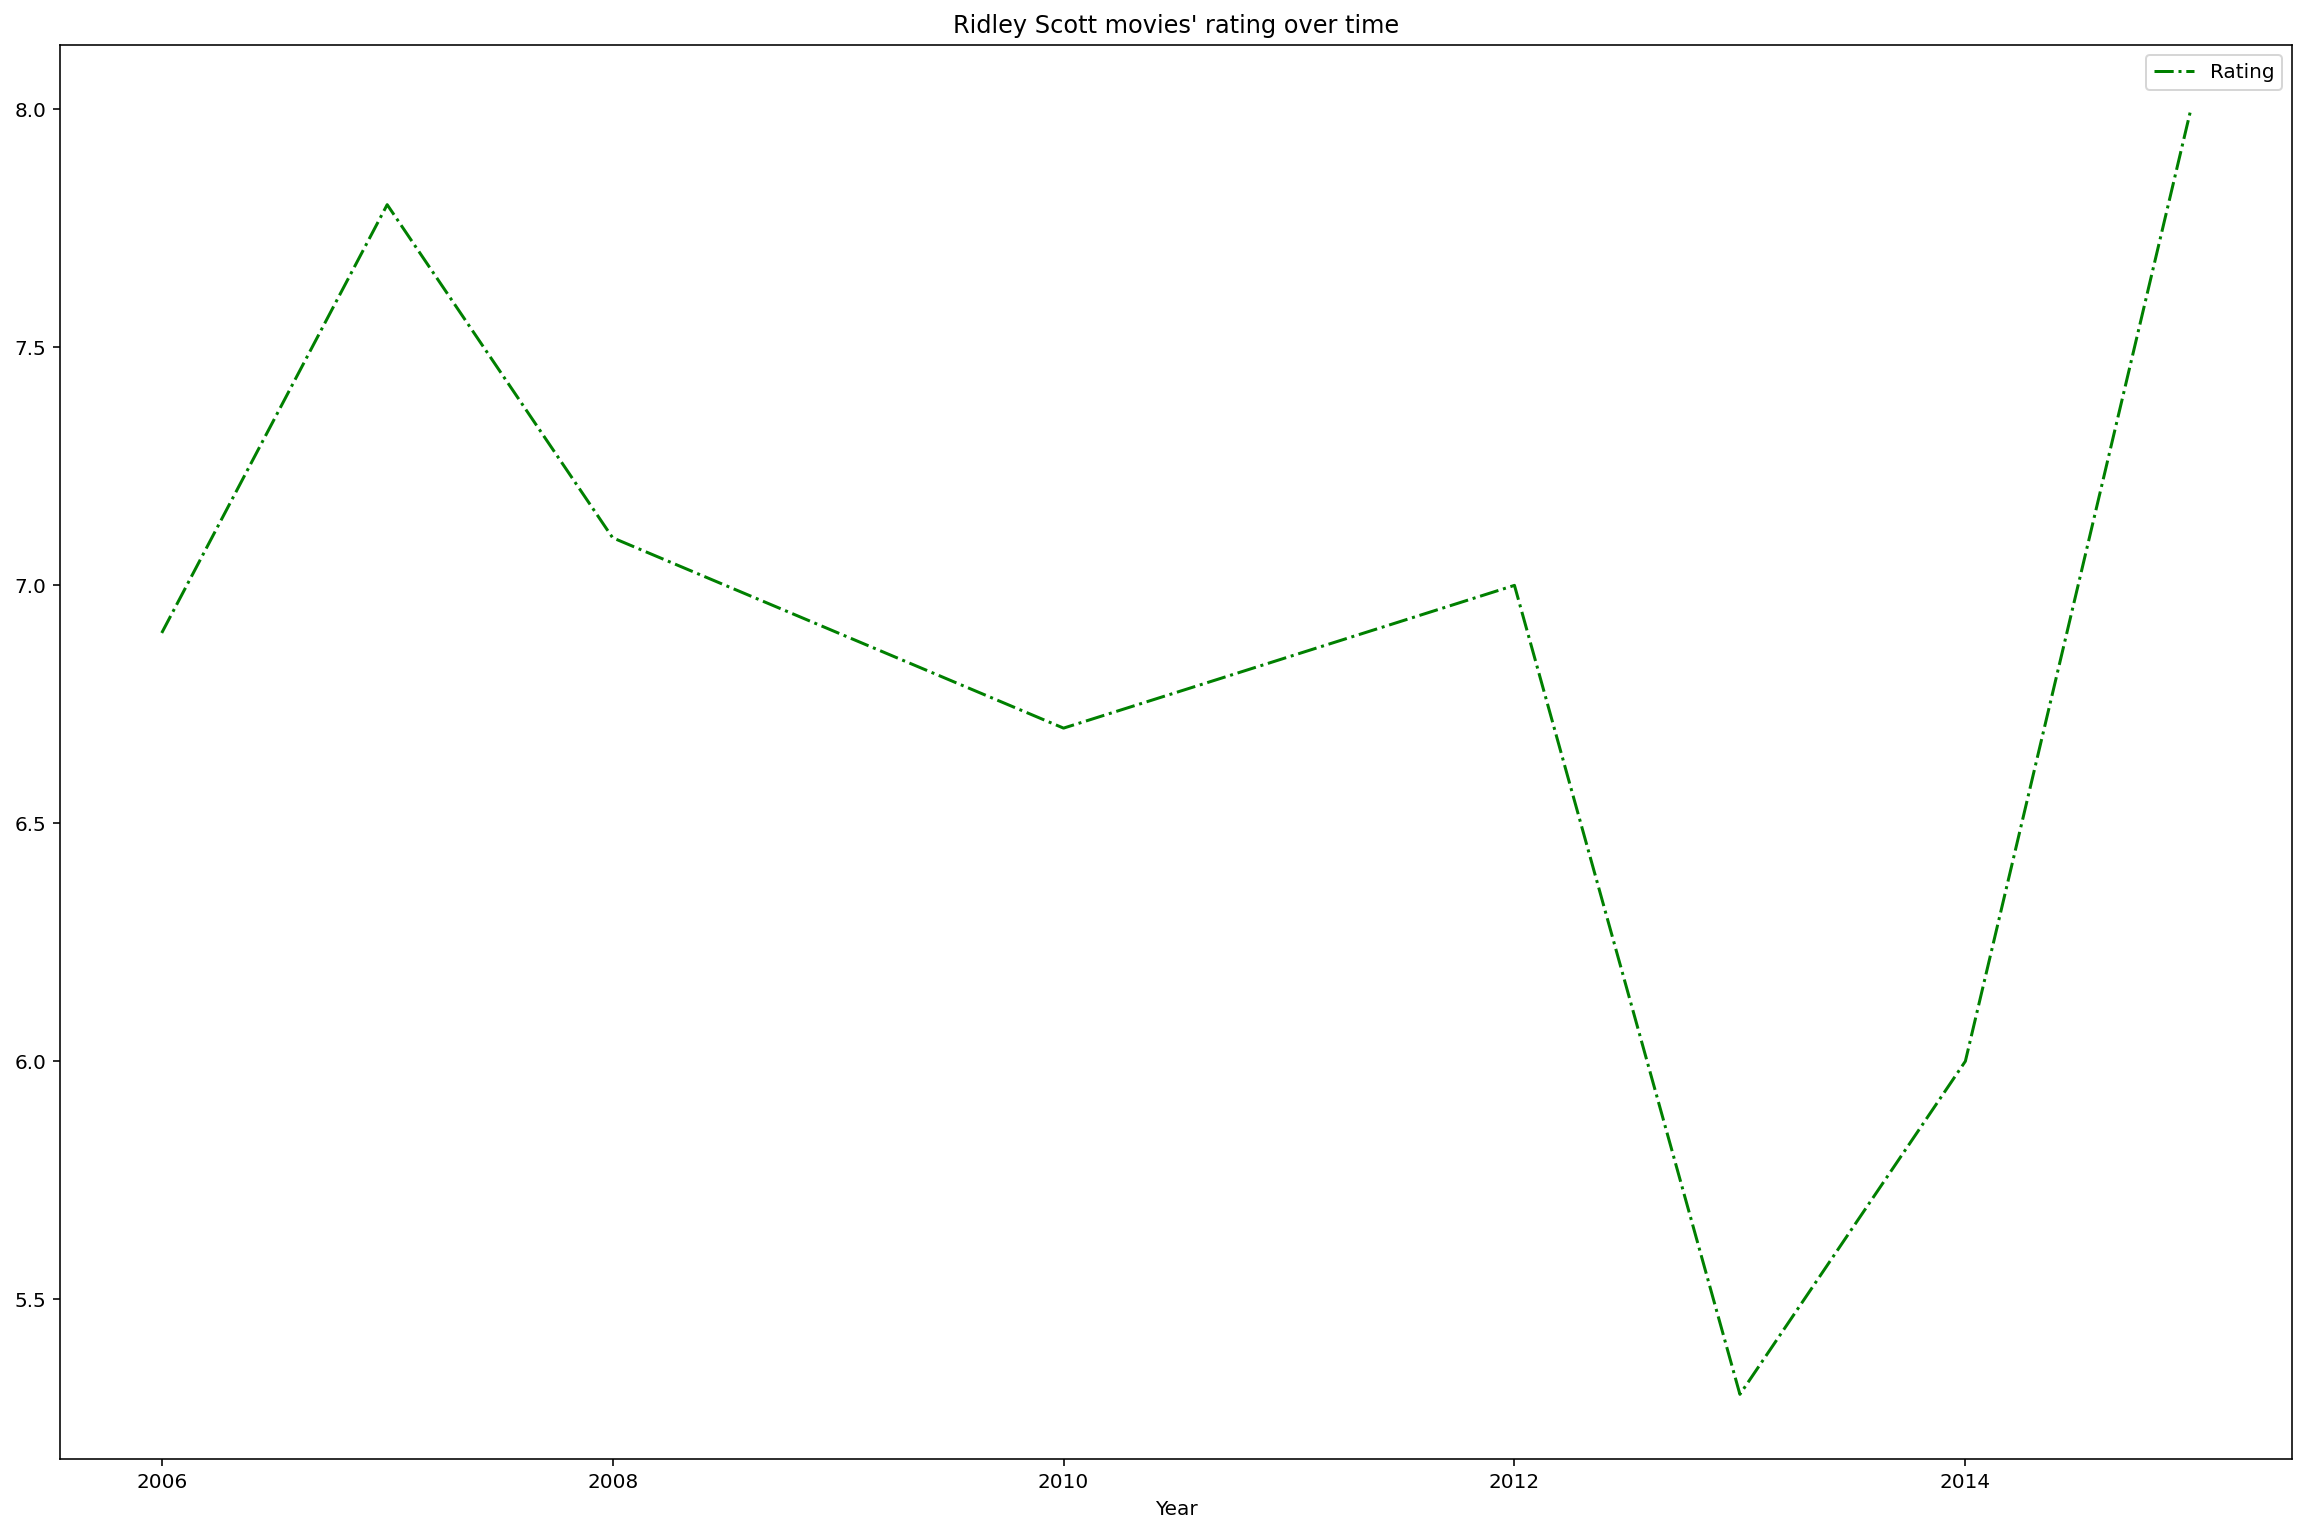

In [34]:
df.query("Director == 'Ridley Scott'").sort_values(by="Year").plot(x="Year",
                                            y="Rating",
                                            linestyle="-.",
                                            title="Ridley Scott movies' rating over time",
                                            color='g',
                                            figsize=(20,13));

### Histograms

If we want to plot a simple Histogram based on a single column, we can call plot on the column series.

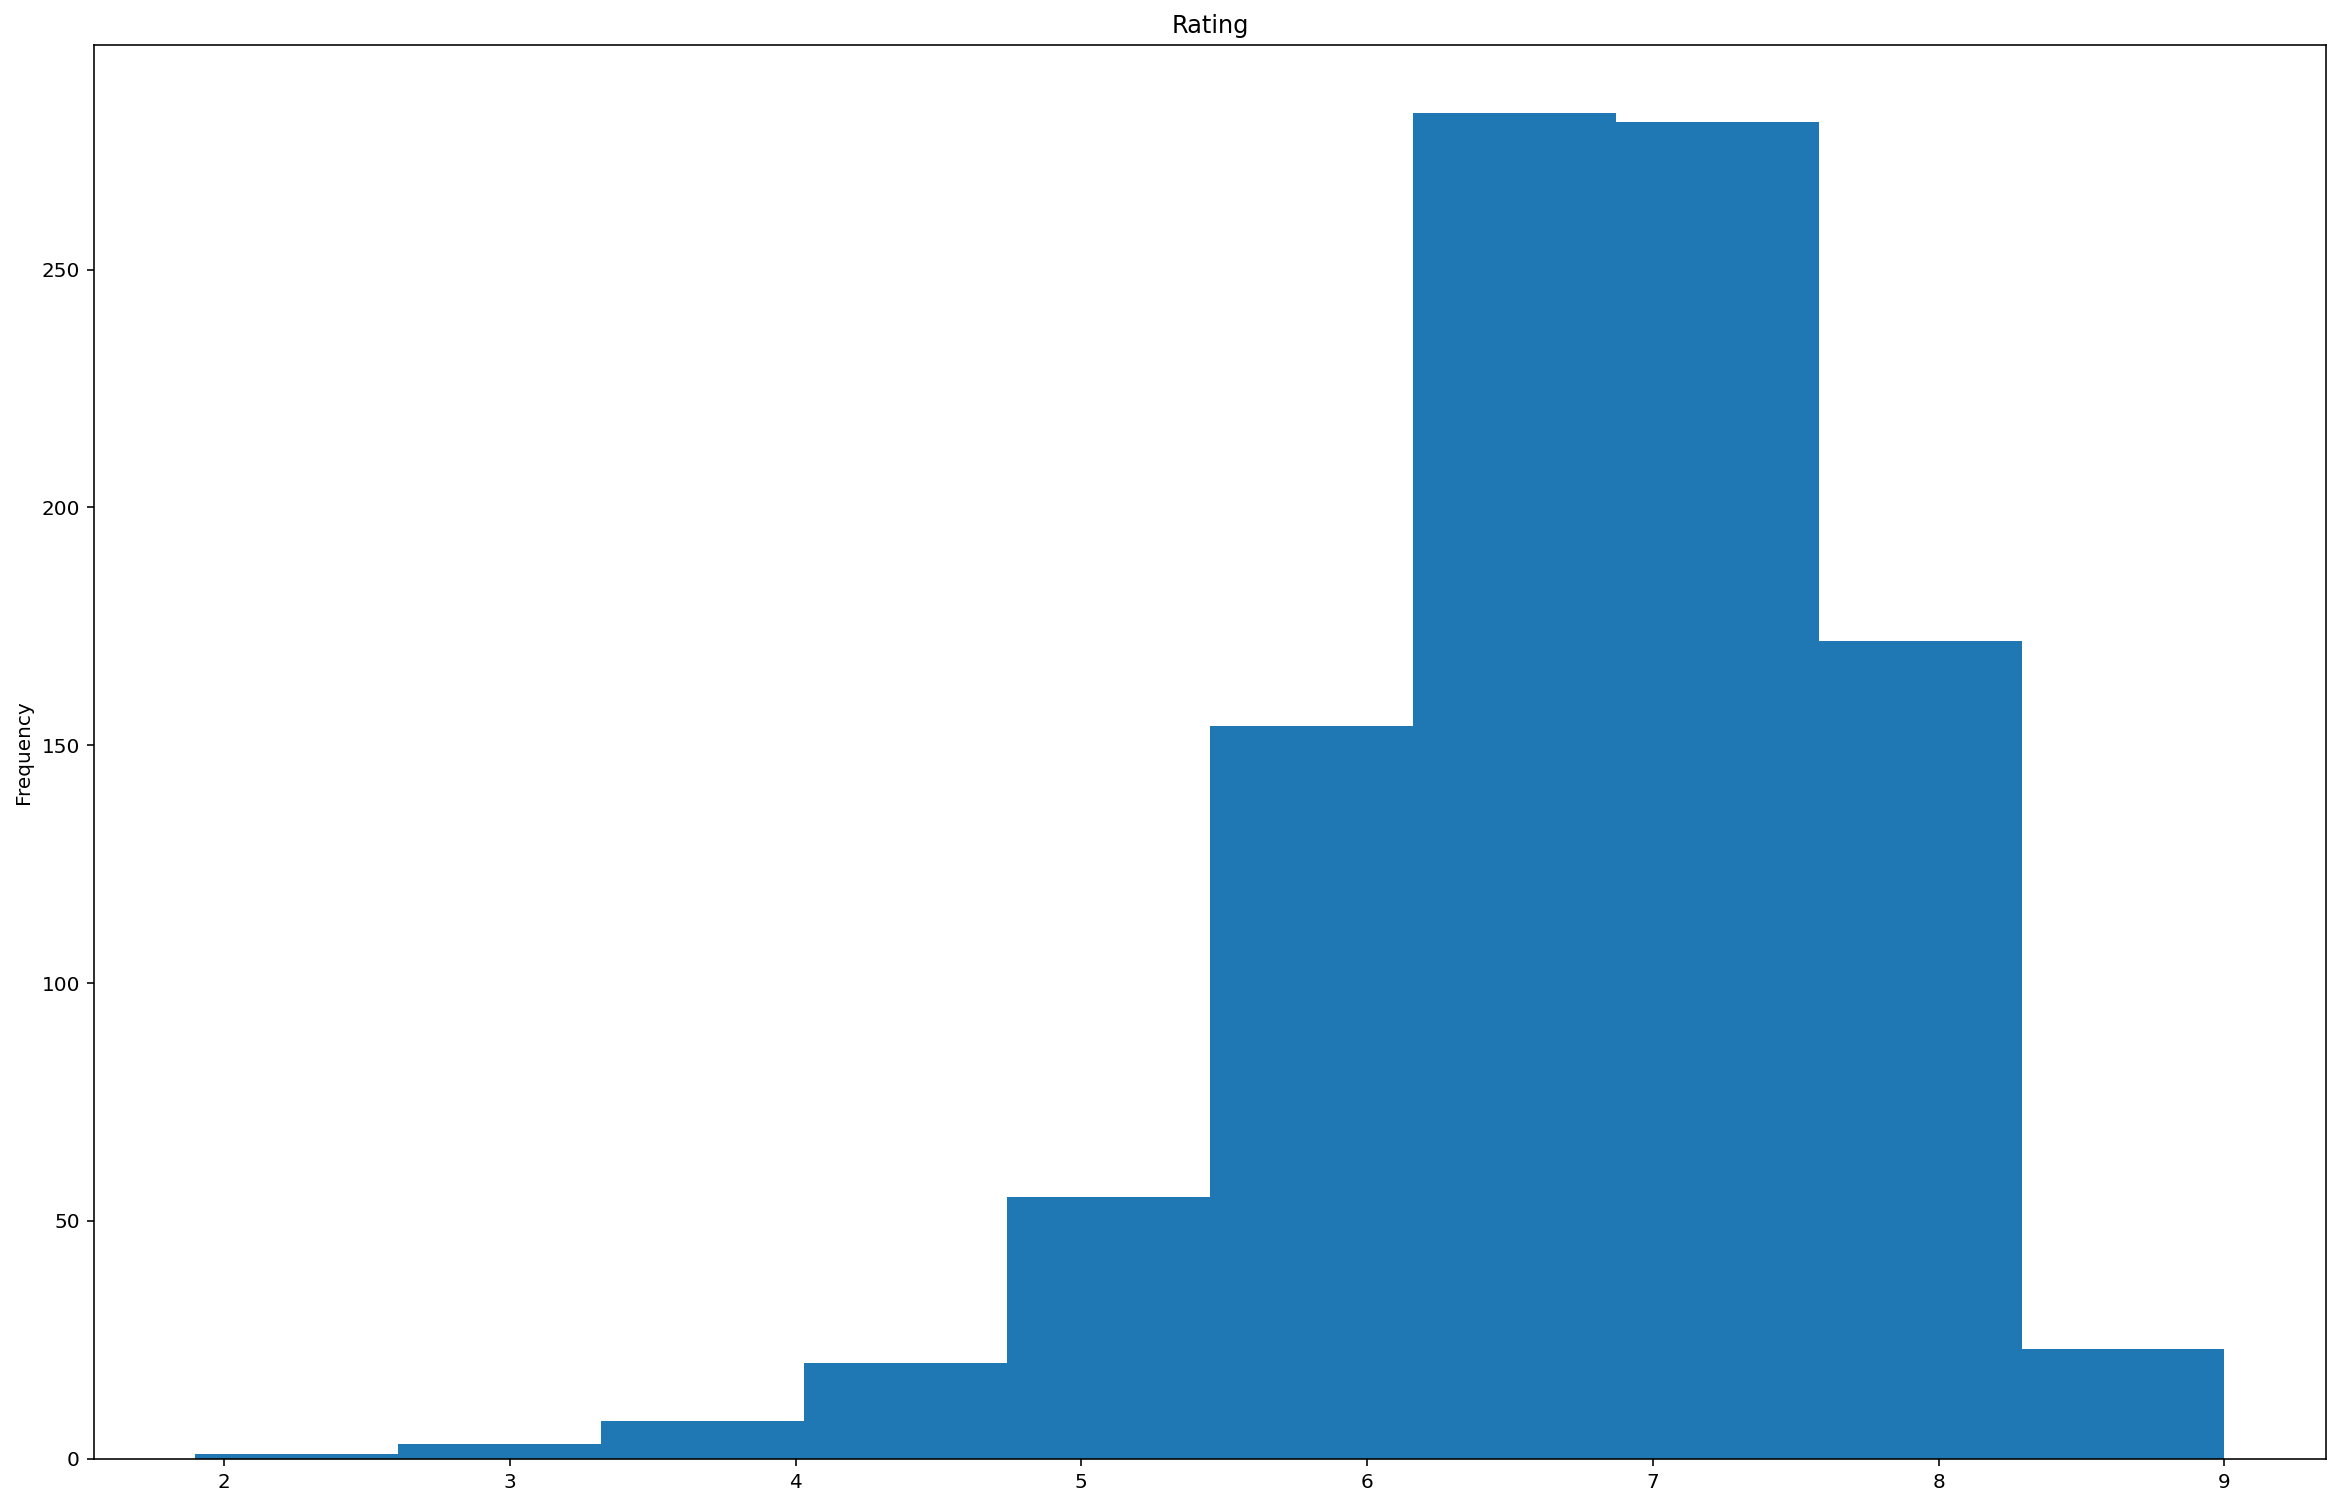

In [20]:
df['Rating'].plot(kind='hist', title='Rating', figsize=(20,13));

We can also make a graphical representation of the interquartile range, called the __Boxplot__. Let's recall what `describe` gives us on the ratings column.

In [21]:
df.Rating.describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

Using a Boxplot we can visualize this data.

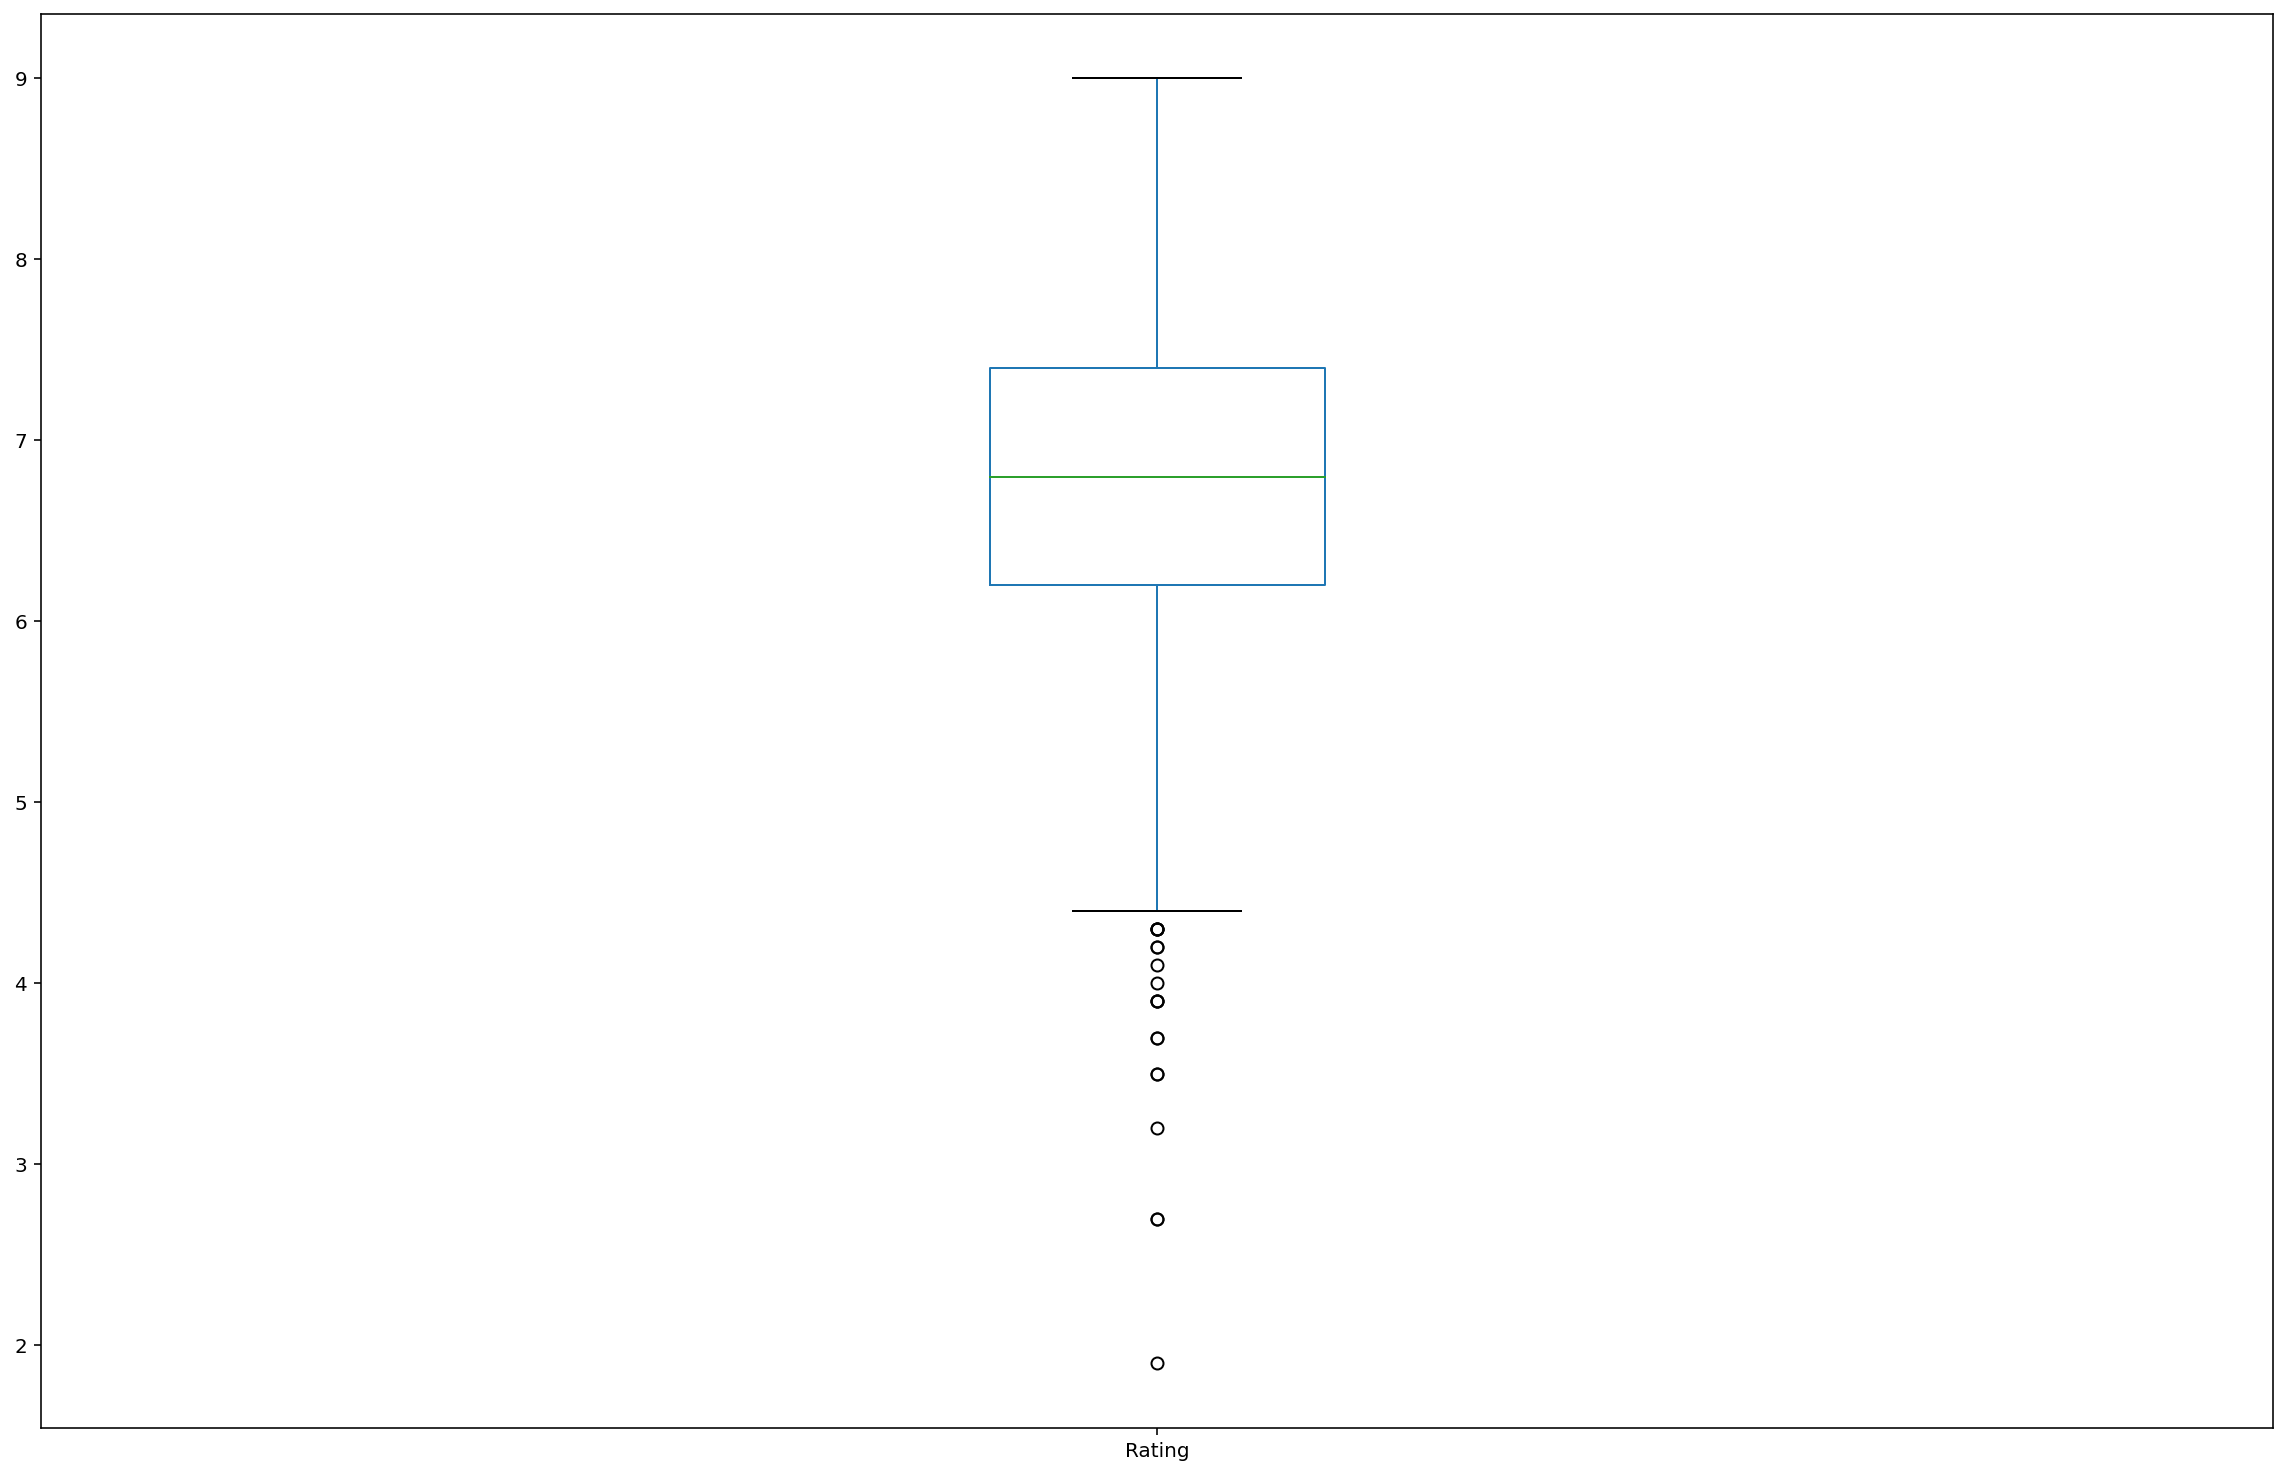

In [38]:
df['Rating'].plot(kind="box",
                figsize=(20,13));

There we go. Finally, let's learn [how to read a boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

To have a brief summary, one can have a look at the picture below.

<p align="center">
    <img width="600" src="https://mathpullzone-8231.kxcdn.com/wp-content/uploads/boxplot-with-outliers.jpg">
</p>

By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by a Rating Category.

In [39]:
# Create rating category column
df["rating_category"] = df.Rating.apply(lambda x: 'good' if x>= 8.0 else 'bad')

You can use the pandas boxplot or the seaborn one. They are equivalent.

The advantage of seaborn is that the `groupby` is hidden by the boxplot, and the code is slightly more compact.

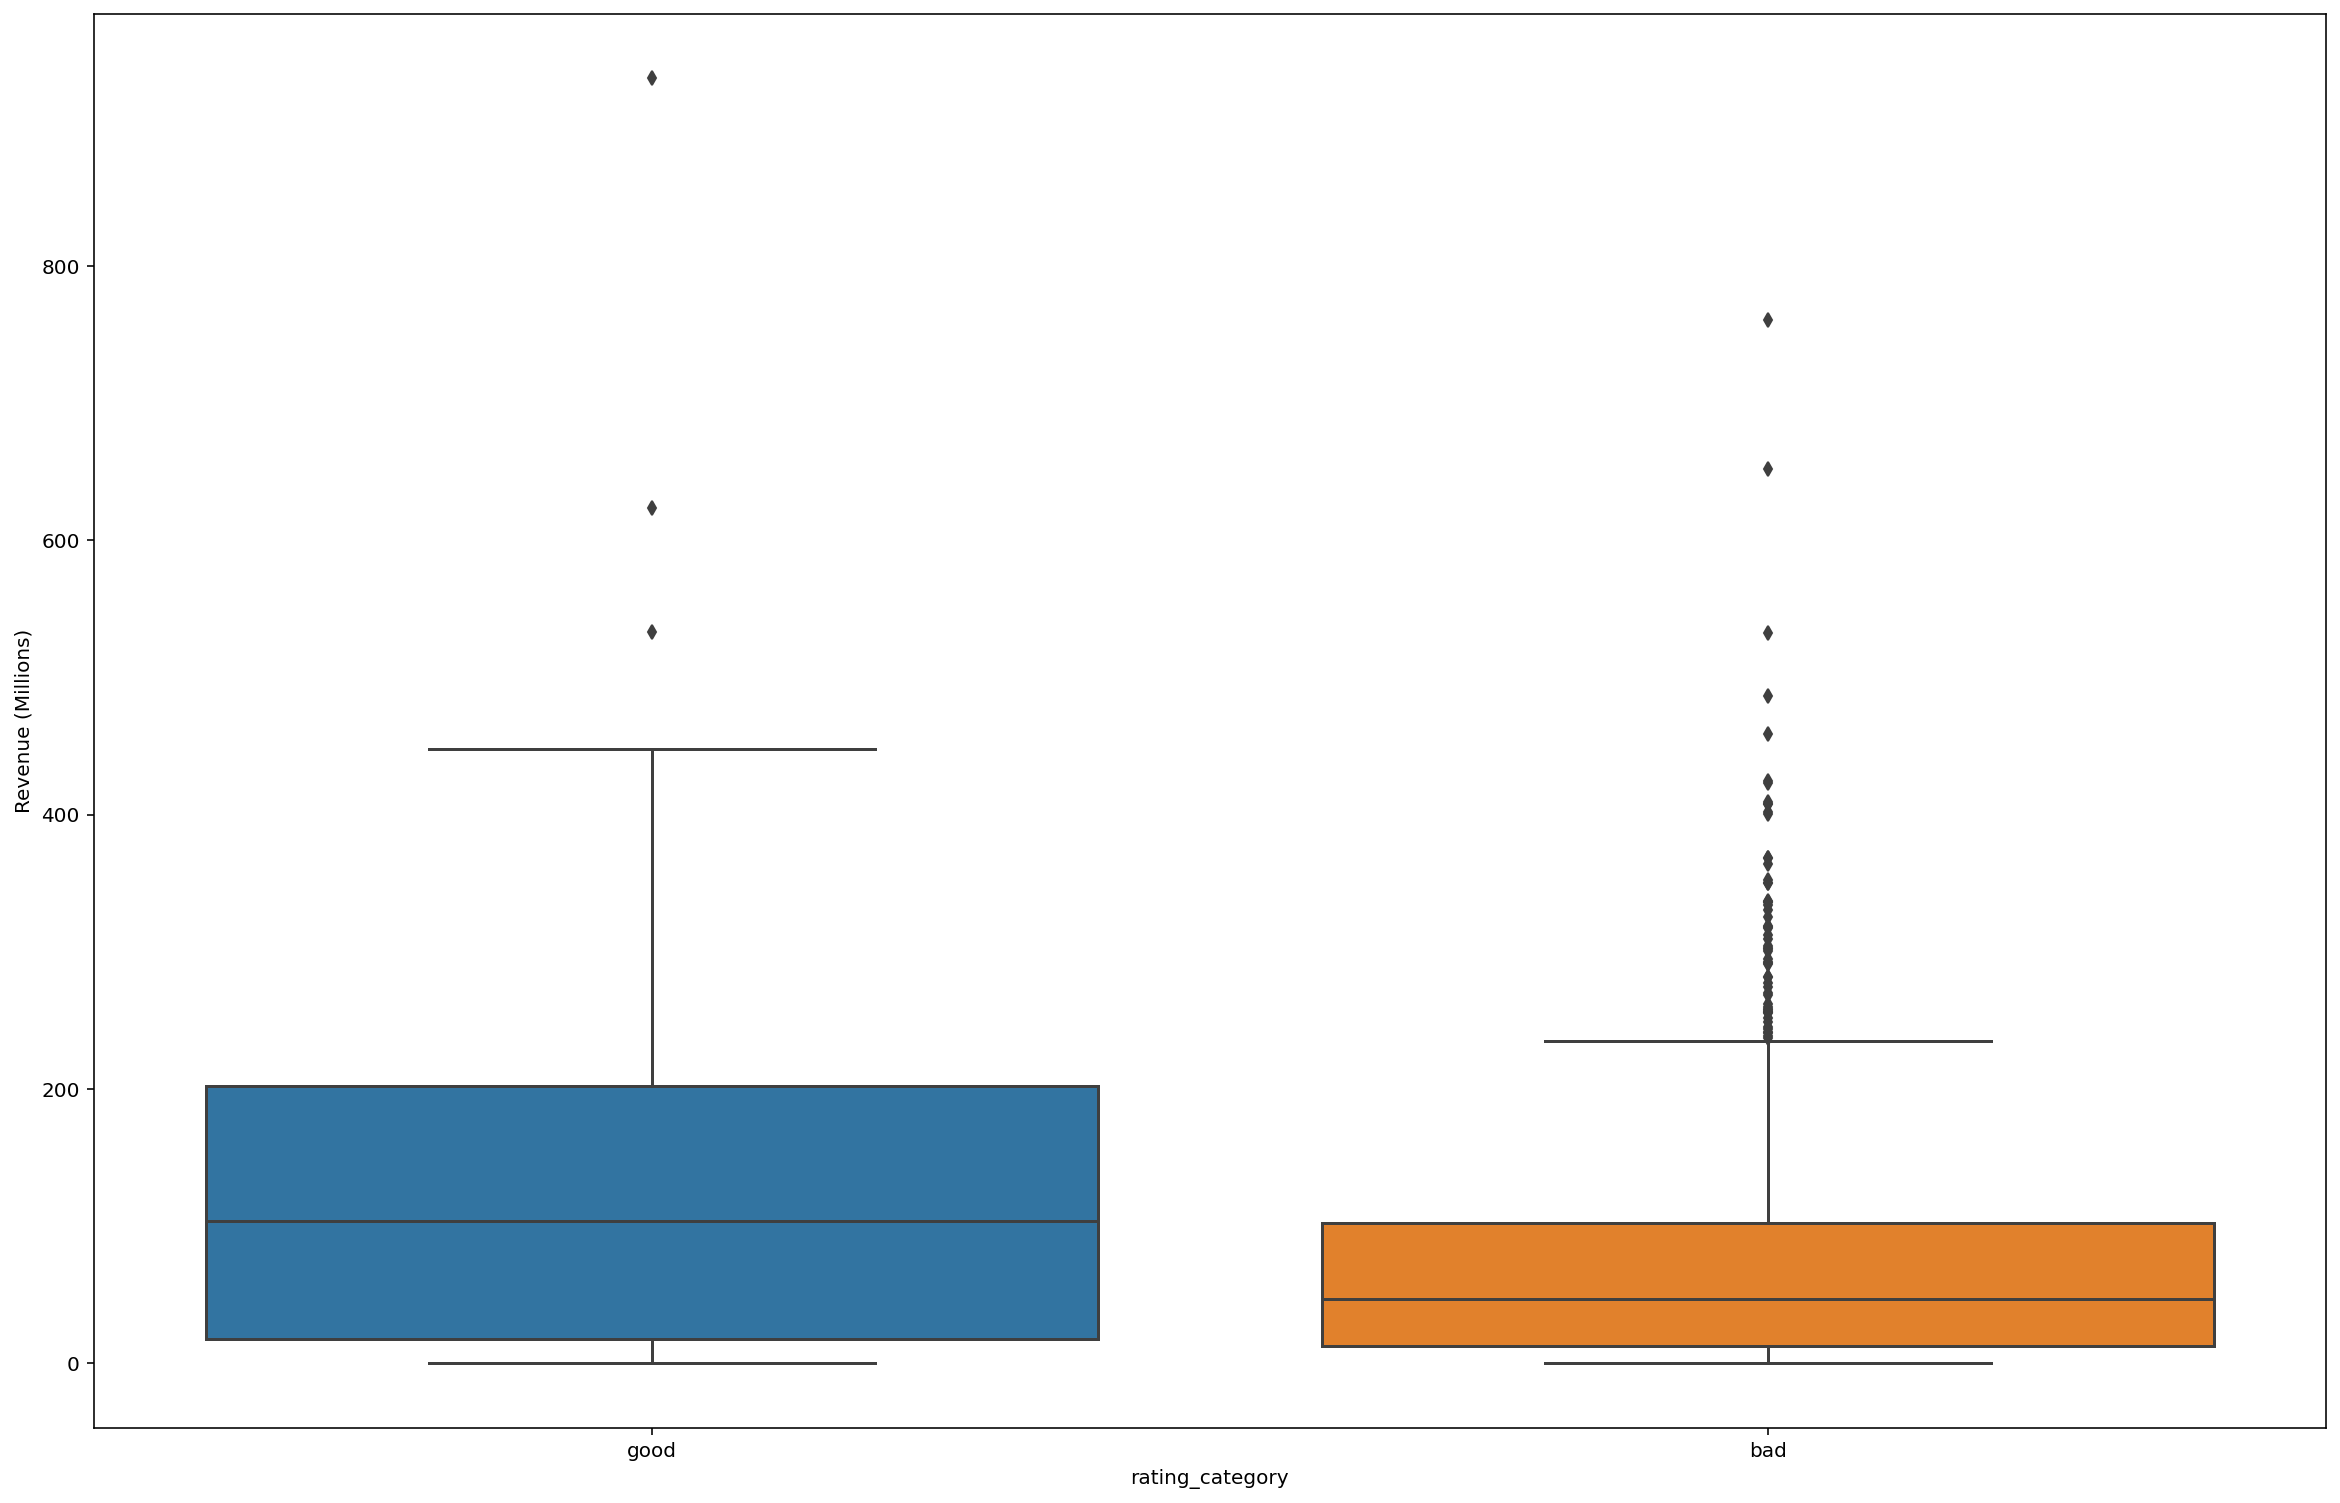

In [45]:
plt.figure(figsize=(20,13))
sns.boxplot(x="rating_category",
            y='Revenue (Millions)',
            data=df);

#### A final suggestion

Always label your axis!

<p align="center">
    <img width="689" src="https://raw.githubusercontent.com/qingkaikong/blog/master/2017_12_machine_learning_funny_pictures/figures/figure_20.png">
</p>

---

#### Exercises

1. Write a Pandas code to get those movies whose revenue more than $2$ million and spent less than $1$ million, sort them by rating, change good/bad threshold to `7.0` for `rating_category` and build an histogram for each rating category.

2. Produce a boxplot for visualising the rating grouped by release year.